🔌 Electricity Cost Analysis & Prediction
This project explores how various urban infrastructure metrics such as water consumption, recycling rate, and resident count influence electricity cost.

Using Python and machine learning, I built a predictive model based on real-world data of 10,000 entries.

💡 Key Skills Demonstrated:

Data Cleaning & Preprocessing

Exploratory Data Analysis (EDA)

Feature Engineering

Linear Regression Modeling

Model Evaluation (MAE, RMSE, R² Score, Adjusted R²)

📌 Prepared by: Alaa Elsawy
📅 Date: July 2025



## ⬇️ Load Data  

In [270]:
# @title 📚Libraries :

import pandas as pd                      # Used to load and manipulate data (DataFrame)
import numpy as np                       # Provides numerical functions and arrays
import matplotlib.pyplot as plt          # For basic plotting and visualizations
import seaborn as sns                    # For advanced and pretty plots (built on top of matplotlib)
from sklearn.preprocessing import RobustScaler  # Scales data while reducing the effect of outliers
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.linear_model import LinearRegression  # Linear Regression model (baseline)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Tools to evaluate model performance (errors and accuracy)
from sklearn.linear_model import Ridge, Lasso   # Regularized linear models to prevent overfitting


In [271]:
#Load data :
df = pd.read_csv("electricity_cost_dataset.csv")

#Read 5 rows from data :
df.head()

,site area,structure type,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
0,1360,Mixed-use,2519.0,69,52,188,1,72,1420.0
1,4272,Mixed-use,2324.0,50,76,165,65,261,3298.0
2,3592,Mixed-use,2701.0,20,94,198,39,117,3115.0
3,966,Residential,1000.0,13,60,74,3,35,1575.0
4,4926,Residential,5990.0,23,65,32,57,185,4301.0


## 🔍 Key Questions Answered by EDA

EDA helps us understand the dataset before preprocessing or modeling:

- **What is the dataset shape and data types?**
- **Are there missing values? How much?**
- **Are there outliers in numeric features?**
- **What does the distribution of each variable look like?**
- **Which features correlate with the target?**
- **How do categories affect the target variable?**
- **Which columns need encoding or scaling?**


In [272]:
# Information about data [Null data or Not , data type , number of rows & columns ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


In [273]:
# Statistics of data :
df.describe()

,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2757.775100,3494.057100,49.598000,64.842200,99.468600,36.402600,85.573100,2837.845000
std,1293.059959,2076.181117,23.430141,20.432965,58.014526,20.623905,107.876179,1106.997441
min,501.000000,1000.000000,10.000000,30.000000,0.000000,1.000000,0.000000,500.000000
25%,1624.000000,1779.000000,29.750000,47.000000,49.000000,19.000000,0.000000,1954.000000
50%,2773.500000,3047.500000,49.000000,65.000000,100.000000,36.000000,39.000000,2760.000000
75%,3874.000000,4811.000000,70.000000,83.000000,150.000000,54.000000,142.000000,3632.000000
max,5000.000000,10894.000000,90.000000,100.000000,200.000000,72.000000,489.000000,6446.000000


In [274]:
# Detect Null values:
df.isnull().sum()

,0
site area,0
structure type,0
water consumption,0
recycling rate,0
utilisation rate,0
air qality index,0
issue reolution time,0
resident count,0
electricity cost,0


In [275]:
# Detect duplicates values :
df.duplicated().sum()

np.int64(0)

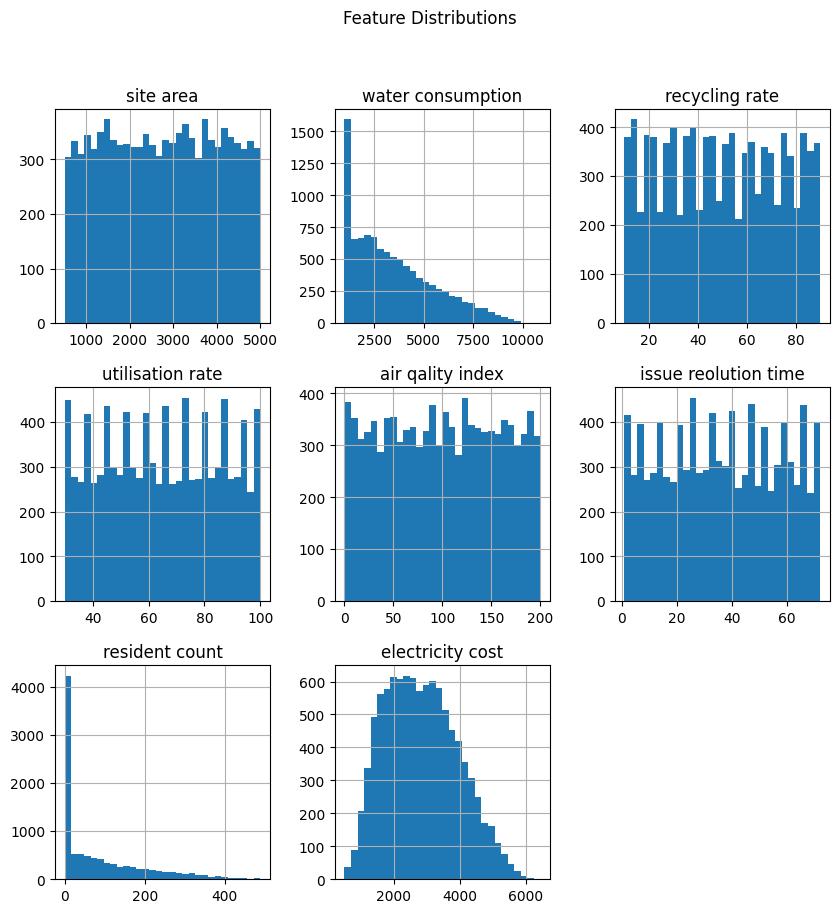

In [276]:
# Plot distributions for numerical features
df.hist(figsize=(10, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

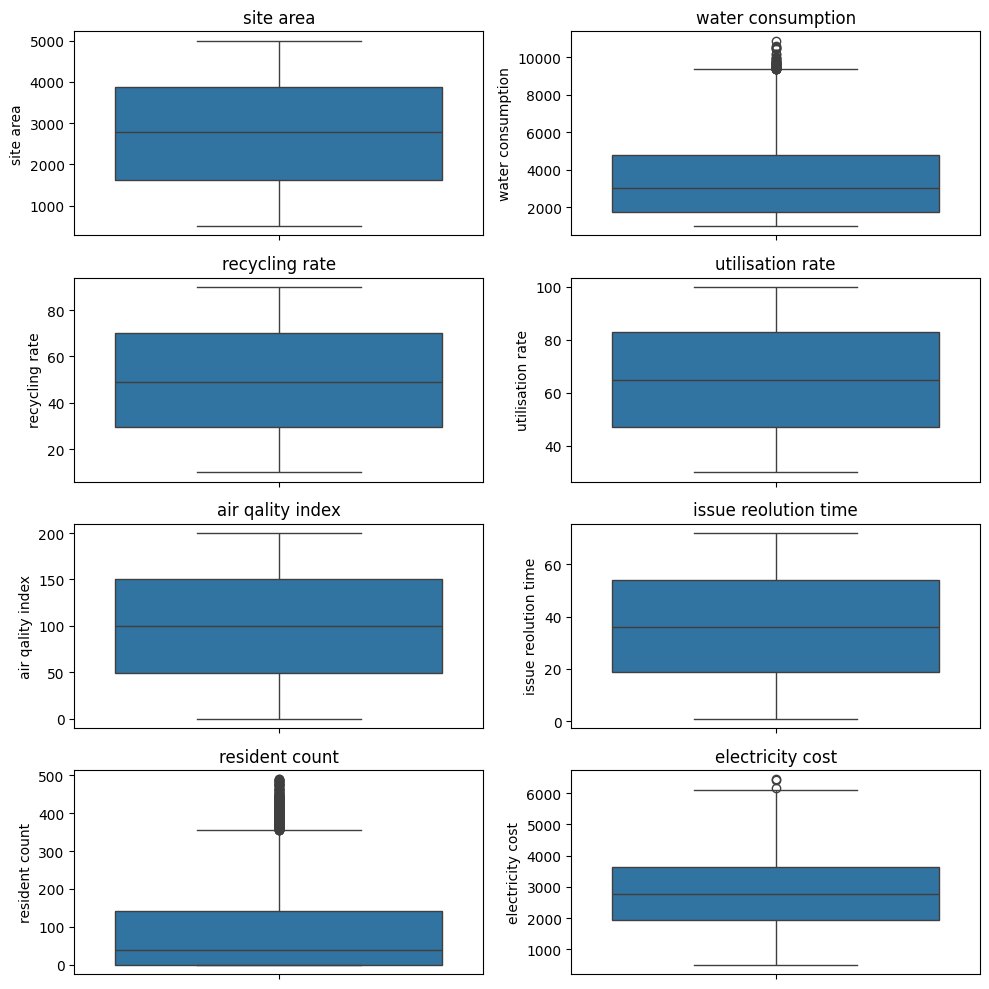

In [277]:
# Boxplots to detect outliers
df_numeric = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 10))
for i , col in enumerate(df_numeric, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

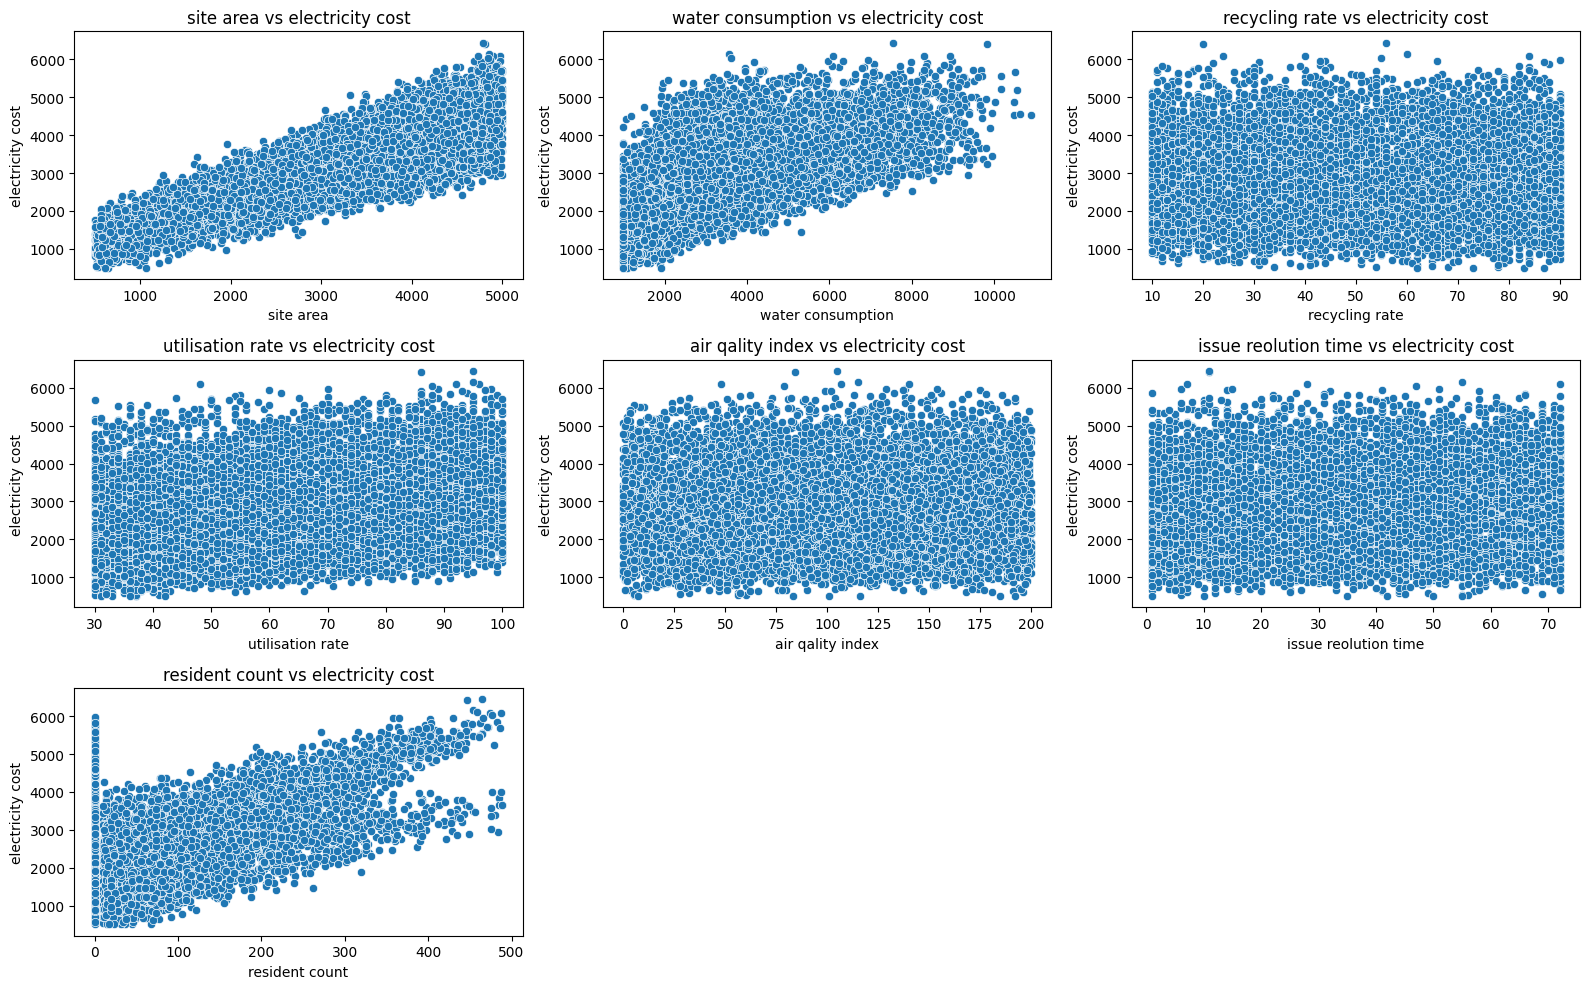

In [278]:
# Scatterplots: features vs electricity cost
target = 'electricity cost'
features = df.select_dtypes(include=['int64', 'float64']).columns.drop(target)

plt.figure(figsize=(16, 10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x=col, y=target)
    plt.title(f'{col} vs {target}')
plt.tight_layout()
plt.show()

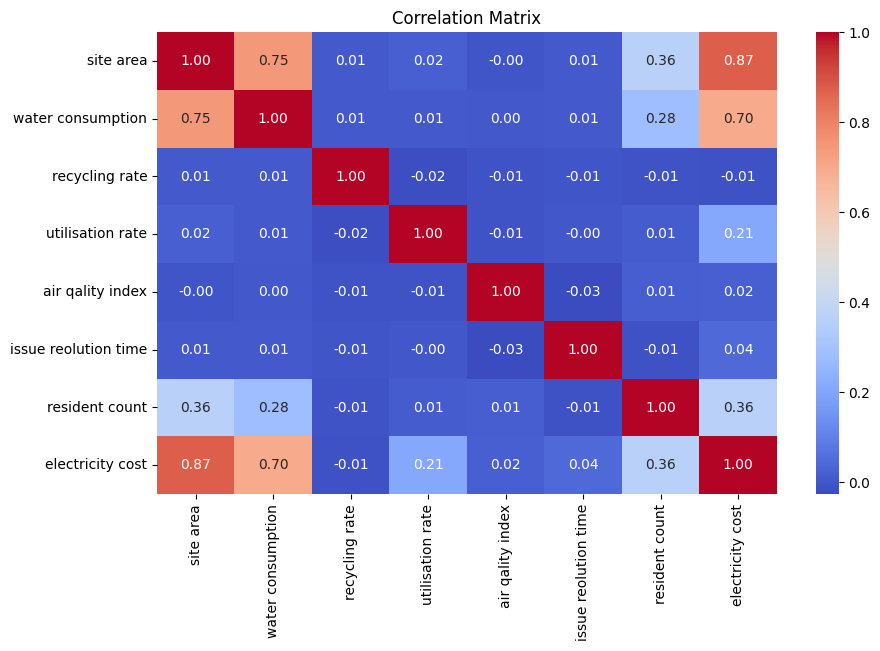

In [279]:
# Heatmap of feature correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# **🧹 Data Preprocessing**

Data preprocessing is a crucial step before modeling. It prepares the dataset for analysis and prediction by handling:

- **Missing values**: Filling or dropping incomplete data to avoid bias or errors.

- **Outliers**: Detecting and removing extreme values that could distort the model.

- **Categorical features** : Encoding text labels into numerical format.

- **Scaling**: Standardizing numeric values to improve model performance.

- **Feature Selection**: Keeping only the most relevant features to reduce noise and improve accuracy.

---
**NOTE:**
This data doesn't have Null Values and duplicates

In [280]:
# @title Feature Selection
target = 'electricity cost'
corr_matrix = df.corr(numeric_only=True)
target_corr = corr_matrix[target].drop(target)
weak_features=target_corr[abs(target_corr) < 0.1].index.tolist()
print('weak_features: \n ',weak_features )
df.drop(weak_features, axis=1, inplace=True)
print('\n')
print('\n')
print('relevant columns :\n ',df.columns)
print('\n')
print(df.head())
print('\n')
print(df.info())

weak_features: 
  ['recycling rate', 'air qality index', 'issue reolution time']




relevant columns :
  Index(['site area', 'structure type', 'water consumption', 'utilisation rate',
       'resident count', 'electricity cost'],
      dtype='object')


   site area structure type  water consumption  utilisation rate  \
0       1360      Mixed-use             2519.0                52   
1       4272      Mixed-use             2324.0                76   
2       3592      Mixed-use             2701.0                94   
3        966    Residential             1000.0                60   
4       4926    Residential             5990.0                65   

   resident count  electricity cost  
0              72            1420.0  
1             261            3298.0  
2             117            3115.0  
3              35            1575.0  
4             185            4301.0  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):

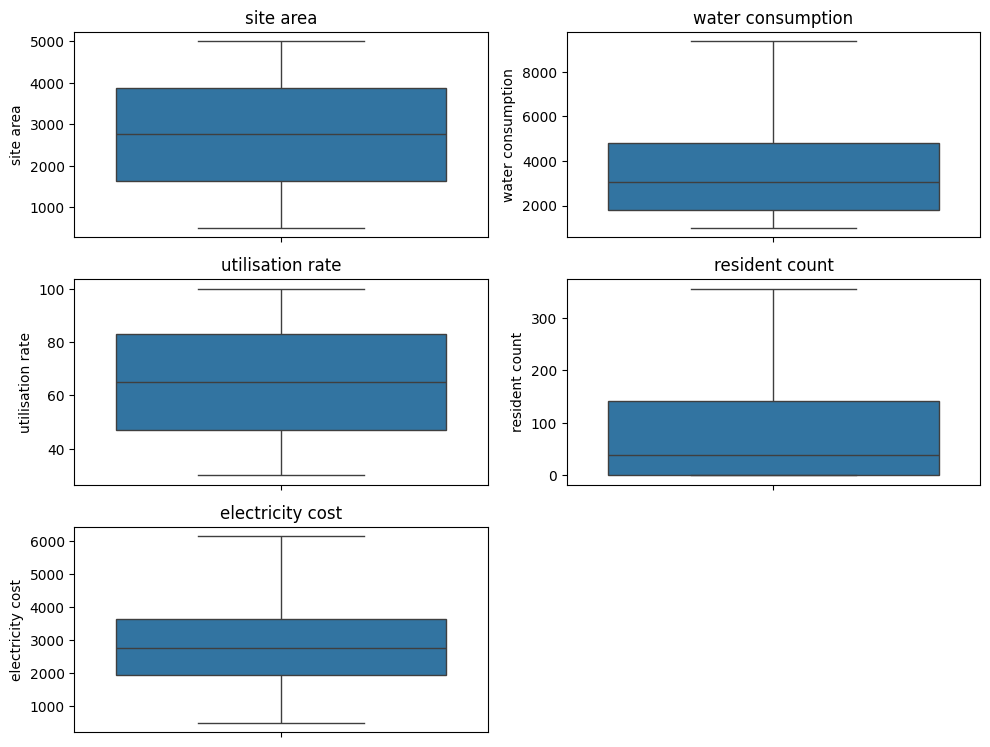

In [281]:
# @title Treatment Outliers :
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numerical columns
df_numeric = df.select_dtypes(include=['int64', 'float64']).columns
Q1 =  df[df_numeric].quantile(0.25)
Q3 =  df[df_numeric].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip values outside the IQR range to the nearest acceptable bound
df[df_numeric]=  df[df_numeric].clip(lower=lower_bound, upper=upper_bound, axis=1)

# Boxplots after treatment Outliers
plt.figure(figsize=(10, 10))
for i , col in enumerate(df_numeric, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [282]:
# @title Encoded category data :

# Identify all object (categorical) columns
df_category = df.select_dtypes(include='object').columns.tolist()

# Apply one-hot encoding and drop the original columns
df = pd.get_dummies(df, columns=df_category, drop_first=True)

# Optional: convert any boolean dummies to integers (0/1)
df = df.astype(int)

# Show the result
df.head()


,site area,water consumption,utilisation rate,resident count,electricity cost,structure type_Industrial,structure type_Mixed-use,structure type_Residential
0,1360,2519,52,72,1420,0,1,0
1,4272,2324,76,261,3298,0,1,0
2,3592,2701,94,117,3115,0,1,0
3,966,1000,60,35,1575,0,0,1
4,4926,5990,65,185,4301,0,0,1


In [283]:
# @title Scaling
scaler = RobustScaler()
df[df_numeric] = scaler.fit_transform(df[df_numeric])
print('scalerd data \n :',df.head())

scalerd data 
 :    site area  water consumption  utilisation rate  resident count  \
0  -0.628222          -0.174307         -0.361111        0.232394   
1   0.666000          -0.238621          0.305556        1.563380   
2   0.363778          -0.114281          0.805556        0.549296   
3  -0.803333          -0.675297         -0.138889       -0.028169   
4   0.956667           0.970482          0.000000        1.028169   

   electricity cost  structure type_Industrial  structure type_Mixed-use  \
0         -0.798570                          0                         1   
1          0.320620                          0                         1   
2          0.211561                          0                         1   
3         -0.706198                          0                         0   
4          0.918355                          0                         0   

   structure type_Residential  
0                           0  
1                           0  
2              

# 🔍 Model Training & Evaluation Summary

In this part, we trained and compared three regression models:

- Linear Regression – the base model.

- Ridge Regression (L2) – adds a penalty for large coefficients to reduce overfitting.

- Lasso Regression (L1) – can reduce some feature weights to zero, helping with feature selection.

### 📊 Evaluation Metrics Used:

- MAE (Mean Absolute Error): Average error in predictions (lower is better).

- RMSE (Root Mean Squared Error): Like MAE but gives more weight to big errors.

- R² Score: How much of the target's variation the model explains (closer to 1 is better).

- Adjusted R²: Same as R² but adjusted for number of features, to prevent overfitting.

### 🧠 Model Selection:

After training all models, we compared their RMSE values.

✅ The model with the lowest RMSE was selected as the best performer

In [284]:
# @title Linear Regression
# split data
X = df.drop('electricity cost', axis=1)
y = df['electricity cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_linear)                    # Mean Absolute Error: average absolute difference between actual and predicted
mse = mean_squared_error(y_test, y_pred_linear)                     # Mean Squared Error: penalizes large errors more than MAE
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)                                          # Root Mean Squared Error: square root of MSE, in the same unit as target
r2 = r2_score(y_test, y_pred_linear)                                # R² Score: proportion of variance explained by the model

# Calculate Adjusted R² Score
n = X_test.shape[0]  # Number of test samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)            # Adjusted R²: adjusts R² based on the number of predictors

# Print all evaluation metrics
print(f"- Average size of the errors. → Model is off by {mae:.2f} units on average.")
print(f"- Like MAE but punishes bigger errors more: {mse:.2f}")
print(f"- Square root of MSE, in same unit as target: {rmse:.2f}")
print(f"- How well the model explains the data. → {r2:.3f} means {r2:.3f} of data variation is explained")
print(f"- Like R² but adjusts for number of features to avoid overfitting :{adjusted_r2:.3f}")


- Average size of the errors. → Model is off by 0.15 units on average.
- Like MAE but punishes bigger errors more: 0.04
- Square root of MSE, in same unit as target: 0.19
- How well the model explains the data. → 0.920 means 0.920 of data variation is explained
- Like R² but adjusts for number of features to avoid overfitting :0.920


In [285]:
# @title Improve model using Rregularization (L1 | L2) :
# Try Ridge Regression (L2)
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Try Lasso Regression (L1)
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Evaluation for Ridge
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

# Evaluation for Lasso
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)

# Print results
print("Ridge Regression:")
print(f"MAE: {ridge_mae:.2f}, RMSE: {ridge_rmse:.2f}, R²: {ridge_r2:.3f}")

print("\nLasso Regression:")
print(f"MAE: {lasso_mae:.2f}, RMSE: {lasso_rmse:.2f}, R²: {lasso_r2:.3f}")

# Decide best model
if ridge_rmse < lasso_rmse:
    print("\n✅ Ridge is better based on lower RMSE.")
else:
    print("\n✅ Lasso is better based on lower RMSE.")


Ridge Regression:
MAE: 0.15, RMSE: 0.19, R²: 0.920

Lasso Regression:
MAE: 0.55, RMSE: 0.67, R²: -0.001

✅ Ridge is better based on lower RMSE.


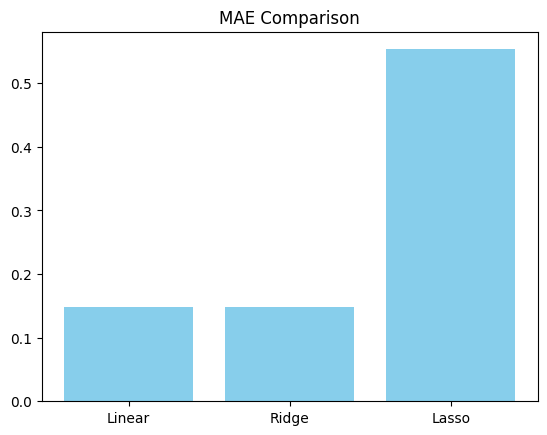

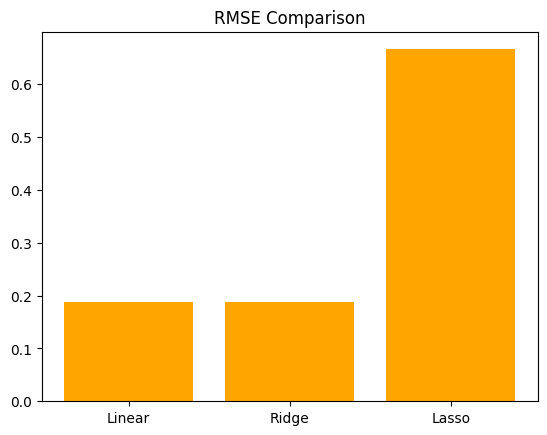

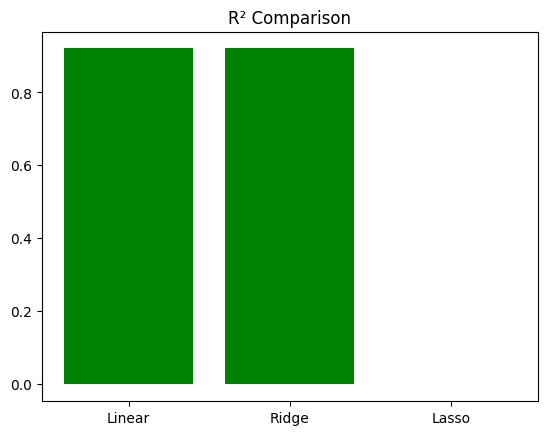

In [286]:
# @title 📊Visualization

#  We calculate the basic metrics
mae = [
    mean_absolute_error(y_test, y_pred_linear),
    mean_absolute_error(y_test, ridge_pred),
    mean_absolute_error(y_test, lasso_pred)
]

rmse = [
    np.sqrt(mean_squared_error(y_test, y_pred_linear)),
    np.sqrt(mean_squared_error(y_test, ridge_pred)),
    np.sqrt(mean_squared_error(y_test, lasso_pred))
]

r2 = [
    r2_score(y_test, y_pred_linear),
    r2_score(y_test, ridge_pred),
    r2_score(y_test, lasso_pred)
]


models = ['Linear', 'Ridge', 'Lasso']

plt.bar(models, mae, color='skyblue')
plt.title('MAE Comparison')
plt.show()

plt.bar(models, rmse, color='orange')
plt.title('RMSE Comparison')
plt.show()

plt.bar(models, r2, color='green')
plt.title('R² Comparison')
plt.show()


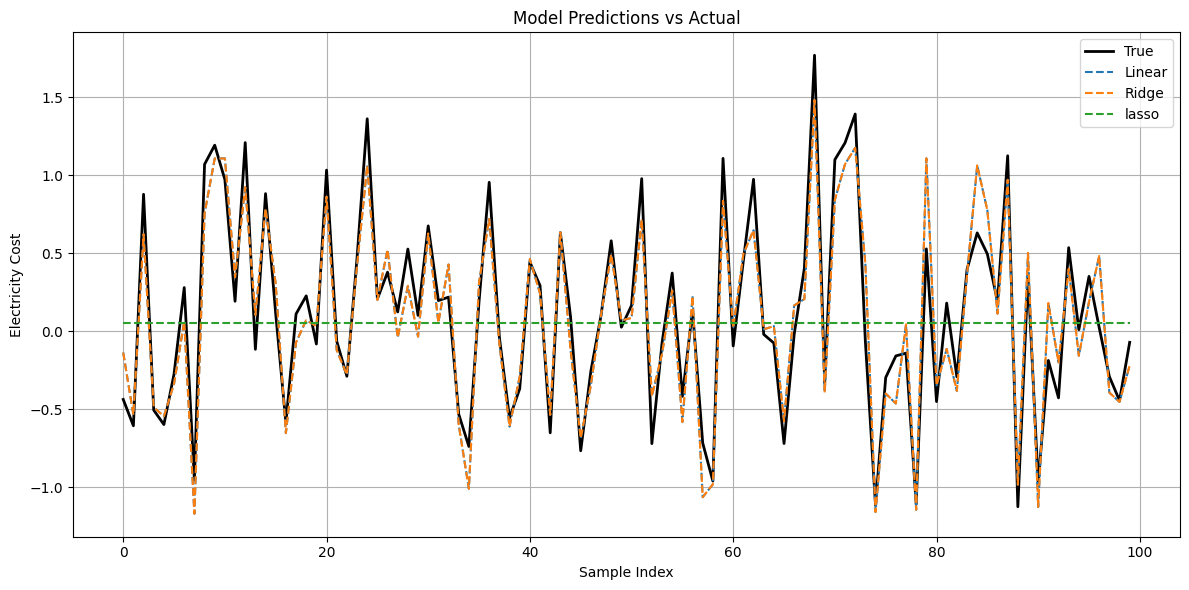

In [287]:
n = 100
x_range = np.arange(n)
y_true = y_test[:n]

plt.figure(figsize=(12, 6))

# actual line
plt.plot(x_range, y_true, label='True', color='black', linewidth=2)

# Line for each model
plt.plot(x_range, y_pred_linear[:n], label='Linear', linestyle='--')
plt.plot(x_range,ridge_pred[:n], label='Ridge', linestyle='--')
plt.plot(x_range,lasso_pred[:n], label='lasso', linestyle='--')

plt.title('Model Predictions vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Electricity Cost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()